In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as skd
import sklearn.cross_validation as skv
%matplotlib inline

# <center> EC3389 - Cross Validation 2</center>

<b>Generate data</b> What is the data generating process associated with the following code?

In [21]:
n_obs = 20

beta = np.array([[5],[0],[2],[1]])

X = np.random.uniform(low = -5, high = 5, size = (n_obs, 1))
XX = np.hstack([X**0, X**1, X**2, X**3])

e = np.random.normal(loc = 0, scale = 15, size = (n_obs,1))

Y = XX.dot(beta) + e

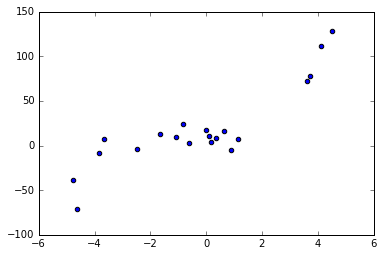

In [22]:
plt.scatter(X, Y)

<b>Review</b> Let's begin by rewriting the functions in our HW3.

In [23]:
def create_polynomial_matrix(X, d):
    v = np.array(range(d + 1))
    return X**v

In [24]:
def ols_coefficients(X, y):
    return np.linalg.pinv(X).dot(y)

In [25]:
def ols_predict(X, betahat):
    return X.dot(betahat)

In [26]:
def ols_mse(y, yhat):
    return np.mean((y - yhat)**2)

<b>K-Fold Cross-Validation</b> In the homeworks, you split the sample and evaluated the model by computing the mse on each set. This time, we will use k-fold cross-validation to do the same. Let's use the scikit-learn.cross_validation function KFold to write a function that does it.

In [27]:
def kfold_mse(XX, Y, n_folds):
    
    test_mse = np.zeros((n_folds, ))
    train_mse = np.zeros((n_folds, ))

    indices = skv.KFold(n_obs, n_folds  = n_folds)

    # "enumerate" is very useful!
    for k, (train_idx, test_idx) in enumerate(indices):
    
        XX_train = XX[train_idx,:]
        Y_train = Y[train_idx,:]
        XX_test = XX[test_idx,:]
        Y_test = Y[test_idx]

        # Fit, predict and score using the mse 
        betahat = ols_coefficients(XX_train, Y_train)
        
        Yhat_train = ols_predict(XX_train, betahat)
        train_mse[k] = ols_mse(Yhat_train, Y_train)
        
        Yhat_test = ols_predict(XX_test, betahat)
        test_mse[k] = ols_mse(Yhat_test, Y_test)
        
    return train_mse, test_mse

## Validation function

Now, for <font face="Courier">degree</font> in <font face="Courier">[0,1,...,max_degree]</font>, do the following:

+ Use <font face ="Courier">create_polynomial_matrix</font> to create a polynomial matrix of different degrees 

+ Use <font face ="Courier">kfold_mse</font> to evaluate the model

+ Store the <i>average</i> MSEs in vectors <font face="Courier">test_avg_mse</font>, <font face="Courier">train_avg_mse</font>. Each of these vectors has length <font face="Courier">max_degree + 1</font>.

In [28]:
max_degree = 8
train_avg_mse = np.zeros((max_degree + 1,))
test_avg_mse = np.zeros((max_degree + 1,))

for r in range(max_degree + 1):
    
    XX = create_polynomial_matrix(X, r)
    train_mse, test_mse = kfold_mse(XX, Y, n_folds = 5)
    train_avg_mse[r] = np.mean(train_mse)
    test_avg_mse[r] = np.mean(test_mse)

Plot all test and train MSEs

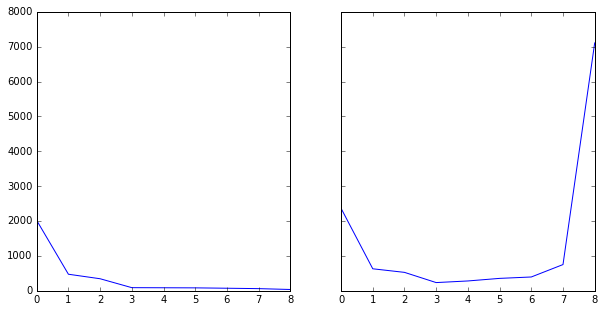

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (10,5), sharey = True)

ax[0].plot(range(max_degree + 1), train_avg_mse)
ax[1].plot(range(max_degree + 1), test_avg_mse)

Plot their difference

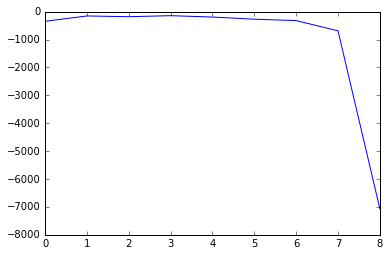

In [30]:
plt.plot(range(max_degree + 1), train_avg_mse - test_avg_mse)

+ What happens when you increase or decrease n_obs? What happens if you increase the variance of $e$? 

+ <b>Think</b> Any ideas to better estimate the "true" expected MSE on training and test sets?

<b>Extra</b> (This will be the next homework) What happens if we use <font face="Courier">ridge_coefficients</font> instead? 